## Problem Statement : Classify the 'size_categorie' using SVM.
----
## Input Variables : 
### 1) month = month of the year: 'jan' to 'dec'
### 2) day = day of the week: 'mon' to 'sun'
### 3) FFMC = FFMC index from the FWI system: 18.7 to 96.20
### 4) DMC = DMC index from the FWI system: 1.1 to 291.3
### 5) DC = DC index from the FWI system: 7.9 to 860.6
### 6) ISI = ISI index from the FWI system: 0.0 to 56.10
### 7) temp = temperature in Celsius degrees: 2.2 to 33.30
### 8) RH = relative humidity in %: 15.0 to 100
### 9) wind = wind speed in km/h: 0.40 to 9.40
### 10) rain = outside rain in mm/m2 : 0.0 to 6.4
### 11) area = total burned area of the forest (in ha): 0.00 to 1090.84
## Target Variable :
### size_category = the burned area of the forest ( Small , Large)

## Objective : Classify the "size_category" (target variable) using SVM Kernel Techniques.

## Import Libraries 

In [1]:
# Necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Feature engineering Libraries
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split

# Model Building Libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report


#import WARNING
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
forestfires = pd.read_csv("forestfires.csv")
forestfires 

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
forestfires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


## Data Understanding

In [4]:
forestfires.shape

(517, 31)

In [5]:
forestfires.duplicated().sum()

8

In [6]:
forestfires = forestfires.drop_duplicates()
forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
forestfires.shape

(509, 31)

In [8]:
forestfires.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
forestfires.nunique()

month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

In [10]:
forestfires.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,509.0,90.618075,5.555527,18.7,90.2,91.60,92.90,96.20
DMC,509.0,110.235756,63.804112,1.1,62.3,108.30,141.30,291.30
DC,509.0,547.787623,248.196222,7.9,437.7,664.20,713.90,860.60
ISI,509.0,9.023576,4.585083,0.0,6.4,8.40,11.00,56.10
temp,509.0,18.865422,5.841083,2.2,15.4,19.30,22.80,33.30
RH,509.0,44.253438,16.365192,15.0,32.0,42.00,53.00,100.00
wind,509.0,4.011395,1.800926,0.4,2.7,4.00,4.90,9.40
rain,509.0,0.020432,0.296261,0.0,0.0,0.00,0.00,6.40
area,509.0,12.992908,64.133357,0.0,0.0,0.61,6.58,1090.84
dayfri,509.0,0.163065,0.369788,0.0,0.0,0.00,0.00,1.00


In [11]:
forestfires.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
month,509,12,aug,178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,509,7,sun,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FFMC,509.0,NaN,NaN,NaN,90.618075,5.555527,18.7,90.2,91.6,92.9,96.2
DMC,509.0,NaN,NaN,NaN,110.235756,63.804112,1.1,62.3,108.3,141.3,291.3
DC,509.0,NaN,NaN,NaN,547.787623,248.196222,7.9,437.7,664.2,713.9,860.6
ISI,509.0,NaN,NaN,NaN,9.023576,4.585083,0.0,6.4,8.4,11.0,56.1
temp,509.0,NaN,NaN,NaN,18.865422,5.841083,2.2,15.4,19.3,22.8,33.3
RH,509.0,NaN,NaN,NaN,44.253438,16.365192,15.0,32.0,42.0,53.0,100.0
wind,509.0,NaN,NaN,NaN,4.011395,1.800926,0.4,2.7,4.0,4.9,9.4
rain,509.0,NaN,NaN,NaN,0.020432,0.296261,0.0,0.0,0.0,0.0,6.4


In [12]:
forestfires['size_category'].unique()

array(['small', 'large'], dtype=object)

In [13]:
forestfires.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

## Correlation of the input variables

In [14]:
forestfires_num_data = forestfires[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']]
forestfires_num_data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000


## Correlation Matrix

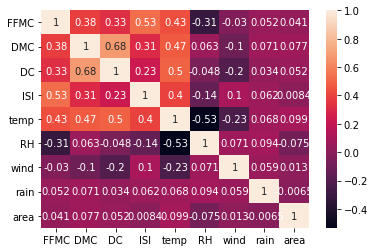

In [15]:
sns.heatmap(forestfires_num_data.corr(), annot=True)
plt.show()

## Data Visualization 

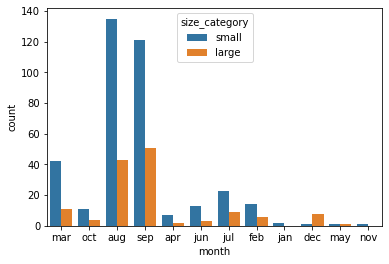

In [16]:
sns.countplot(forestfires['month'],hue=forestfires['size_category'])
plt.show()

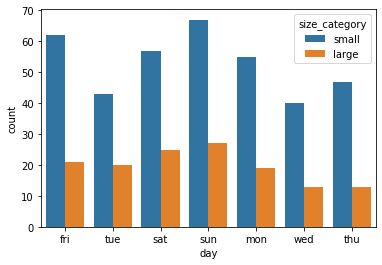

In [17]:
sns.countplot(forestfires['day'],hue=forestfires['size_category'])
plt.show()

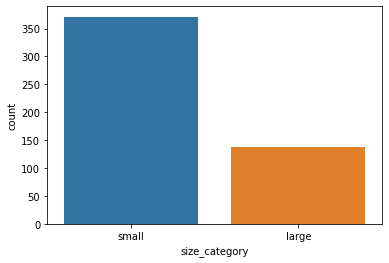

In [18]:
sns.countplot(forestfires['size_category'])
plt.show()

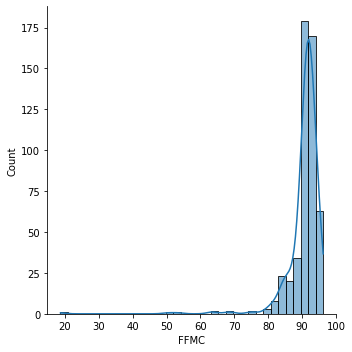

In [19]:
sns.displot(forestfires['FFMC'],kde=True, bins=35)
plt.show()

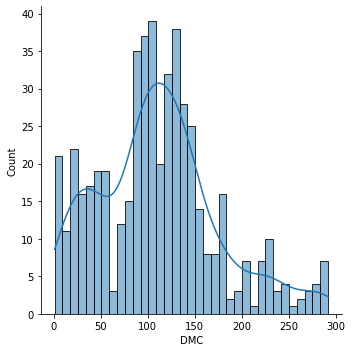

In [20]:
sns.displot(forestfires['DMC'],kde=True, bins=35)
plt.show()

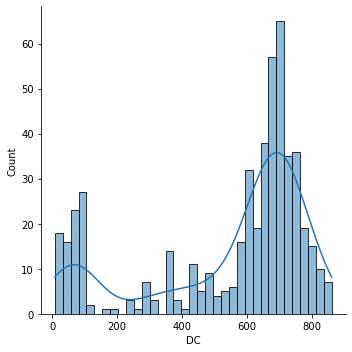

In [21]:
sns.displot(forestfires['DC'],kde=True, bins=35)
plt.show()

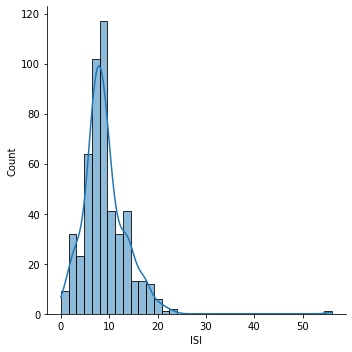

In [22]:
sns.displot(forestfires['ISI'],kde=True, bins=35)
plt.show()

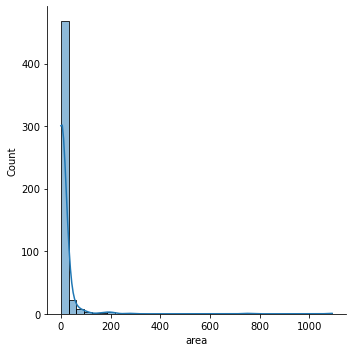

In [23]:
sns.displot(forestfires['area'],kde=True, bins=35)
plt.show()

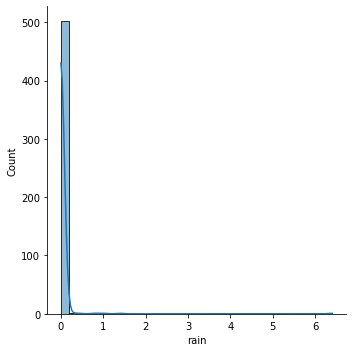

In [24]:
sns.displot(forestfires['rain'],kde=True, bins=35)
plt.show()

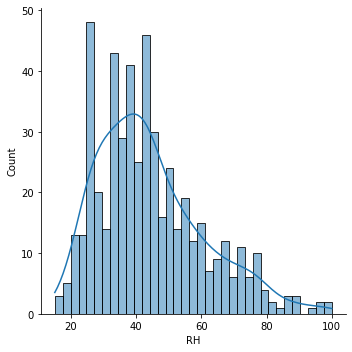

In [25]:
sns.displot(forestfires['RH'],kde=True, bins=35)
plt.show()

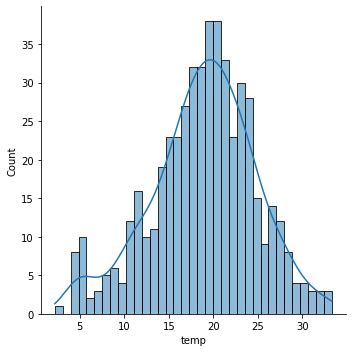

In [26]:
sns.displot(forestfires['temp'],kde=True, bins=35)
plt.show()

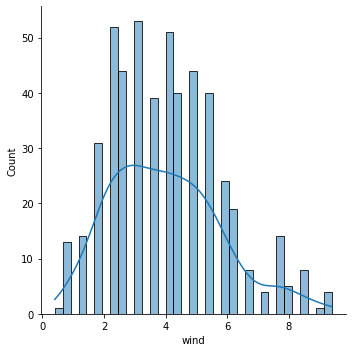

In [27]:
sns.displot(forestfires['wind'],kde=True, bins=35)
plt.show()

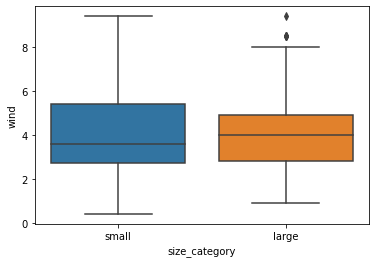

In [28]:
sns.boxplot(forestfires['size_category'],forestfires['wind'])
plt.show()

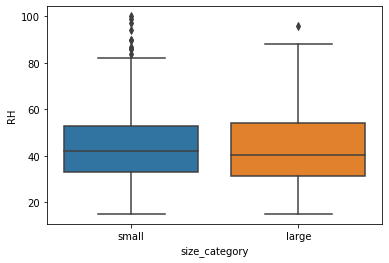

In [29]:
sns.boxplot(forestfires['size_category'],forestfires['RH'])
plt.show()

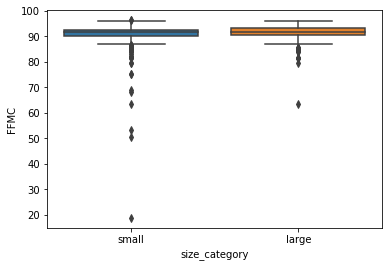

In [30]:
sns.boxplot(forestfires['size_category'],forestfires['FFMC'])
plt.show()

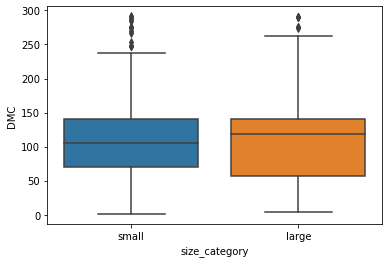

In [31]:
sns.boxplot(forestfires['size_category'],forestfires['DMC'])
plt.show()

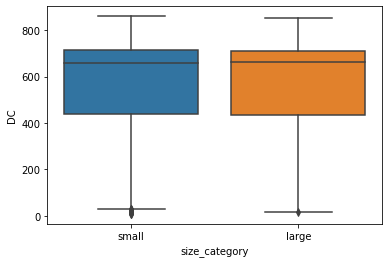

In [32]:
sns.boxplot(forestfires['size_category'],forestfires['DC'])
plt.show()

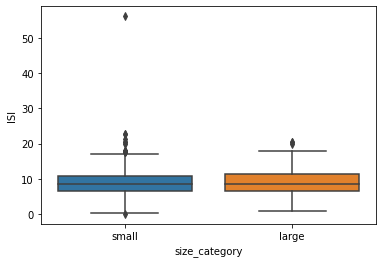

In [33]:
sns.boxplot(forestfires['size_category'],forestfires['ISI'])
plt.show()

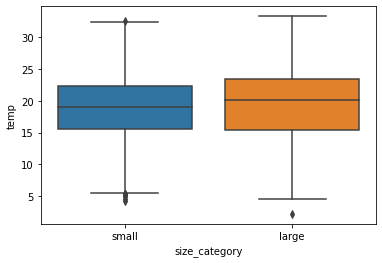

In [34]:
sns.boxplot(forestfires['size_category'],forestfires['temp'])
plt.show()

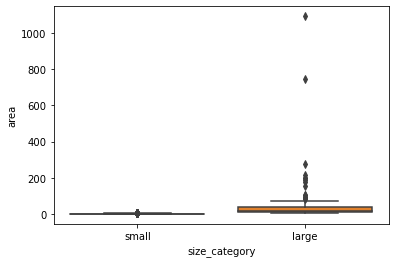

In [35]:
sns.boxplot(forestfires['size_category'],forestfires['area'])
plt.show()

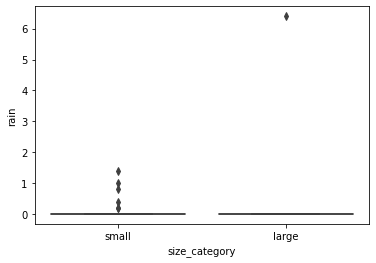

In [36]:
sns.boxplot(forestfires['size_category'],forestfires['rain'])
plt.show()

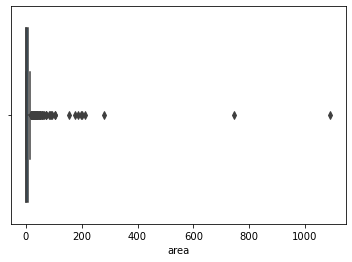

In [37]:
sns.boxplot(forestfires['area'])
plt.show()

### From above BoxPlot we can say that there are majorly 3 Outlier instances in our dataset.
----

Skew: 12.75393973327039
Kurtosis: 191.2657222312397


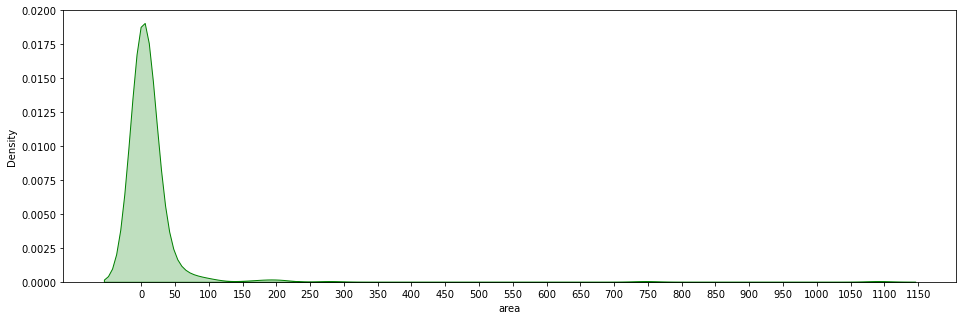

In [38]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(forestfires['area'].skew()))
print("Kurtosis: {}".format(forestfires['area'].kurtosis()))
ax = sns.kdeplot(forestfires['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

### The data is highly skewed to the right (right skewed or positive skewness) and has large kurtosis value.

### Majority of the forest fires do not cover a large area, most of the damaged area is under 100 hectares of land.
-----

In [39]:
forestfires['month'].value_counts()

aug    178
sep    172
mar     53
jul     32
feb     20
jun     16
oct     15
dec      9
apr      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [40]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}

In [41]:
forestfires = forestfires.replace(order)
forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,8,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,8,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,8,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


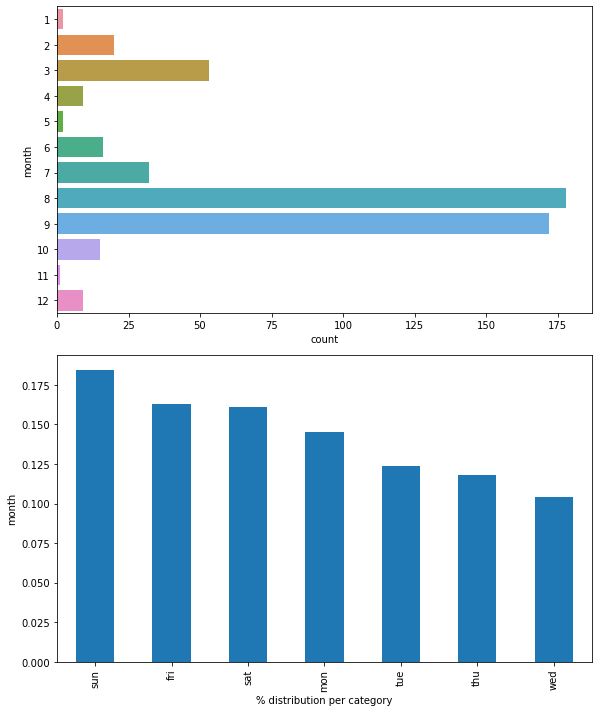

In [42]:
plt.figure(figsize=(16,10))
for i,col in enumerate(order,1):
    plt.subplot(2,2,i)
    sns.countplot(data=forestfires,y='month')
    plt.subplot(2,2,i+2)
    forestfires['day'].value_counts(normalize=True).plot.bar()
    plt.ylabel('month')
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

### Majority of the fire occurs in the months Aug (8) and Sep (9).

### For Days : Fri, Sat and Sun have recorded the most cases.
----




## Model Building

In [43]:
X = forestfires.drop(['day','size_category'],axis=1)
y= forestfires['size_category']

In [44]:
mapping = {'small': 0, 'large': 1}

In [45]:
y = y.replace(mapping)

In [46]:
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 509, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121212,stratify = y)

In [48]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((407, 29), (407,), (102, 29), (102,))

## Data Preprocessing

In [49]:
sscalar = StandardScaler()
sscalar.fit(X_train)

StandardScaler()

In [50]:
scaled_X_train = sscalar.transform(X_train)

In [51]:
scaled_X_test = sscalar.transform(X_test)

In [52]:
#Converting Numpy arrays into DataFrame
scaled_X_train = pd.DataFrame(scaled_X_train,columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaled_X_test,columns=X_test.columns)

In [53]:
scaled_X_train.shape, scaled_X_test.shape, y_train.shape, y_test.shape

((407, 29), (102, 29), (407,), (102,))

## GridSearch CV 

In [54]:
%%time
svm_model= SVC()
svm_param_grid= {'kernel': ['rbf', 'poly', 'linear','sigmoid'], 'gamma': [50, 10, 6, 5, 4, 0.5], 'degree': [2,3,4], 'C': [15,14,13,12,11,10,1]}
gscv= GridSearchCV(svm_model, param_grid=svm_param_grid, cv=7)
gscv.fit(scaled_X_train, y_train)

Wall time: 3min 18s


GridSearchCV(cv=7, estimator=SVC(),
             param_grid={'C': [15, 14, 13, 12, 11, 10, 1], 'degree': [2, 3, 4],
                         'gamma': [50, 10, 6, 5, 4, 0.5],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']})

In [55]:
#printing the best scores of GridSearch CV
print('Best Parameters are : ', gscv.best_params_)
print('Best Score is       : ',round(gscv.best_score_,2))  

Best Parameters are :  {'C': 15, 'degree': 2, 'gamma': 50, 'kernel': 'linear'}
Best Score is       :  0.97


## Model Training

In [56]:
linear_kernel = SVC(kernel='linear', C= 15, degree=2, gamma=50)
linear_kernel.fit(scaled_X_train, y_train)

SVC(C=15, degree=2, gamma=50, kernel='linear')

## Model Testing || Model Evaluation

In [57]:
## Train data
y_pred_train = linear_kernel.predict(scaled_X_train)

In [58]:
acc_train= accuracy_score(y_train, y_pred_train)
print('Accuracy :', round(acc_train,2))
print('Confusion Matrix : \n',confusion_matrix(y_train, y_pred_train))
print('Classification Report : \n', classification_report(y_train, y_pred_train))

Accuracy : 0.99
Confusion Matrix : 
 [[296   1]
 [  4 106]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       297
           1       0.99      0.96      0.98       110

    accuracy                           0.99       407
   macro avg       0.99      0.98      0.98       407
weighted avg       0.99      0.99      0.99       407



In [59]:
## Test data
y_pred_test = linear_kernel.predict(scaled_X_test)

In [60]:
acc_test= accuracy_score(y_test, y_pred_test)
print('Accuracy :', round(acc_test,2))
print('Confusion Matrix : \n',confusion_matrix(y_test, y_pred_test))
print('Classification Report : \n', classification_report(y_test, y_pred_test))

Accuracy : 0.97
Confusion Matrix : 
 [[74  0]
 [ 3 25]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      0.89      0.94        28

    accuracy                           0.97       102
   macro avg       0.98      0.95      0.96       102
weighted avg       0.97      0.97      0.97       102



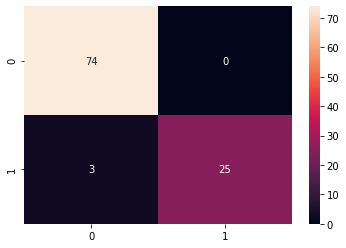

In [61]:
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True)
plt.show()

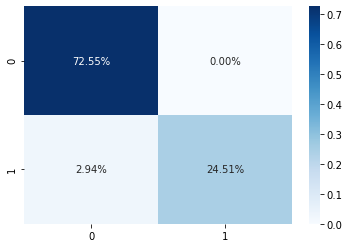

In [62]:
sns.heatmap(confusion_matrix(y_test,y_pred_test)/np.sum(confusion_matrix(y_test,y_pred_test)),annot=True,fmt='.2%',cmap='Blues')
plt.show()

## Conclusion : " *Linear_Kernel* " Model gives the best accuracy of 97% 






In [63]:
size_category_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
size_category_df

,Actual,Predicted
192,1,1
148,0,0
379,0,0
420,1,1
38,0,0
...,...,...
137,0,0
23,0,0
28,0,0
239,0,0
